# 📘 Taller Evaluativo (20%) - Análisis de Portafolio
### Curso: Ingeniería Financiera / Programación  
### Herramienta: Google Colab  
---
### 🎯 Objetivo
Este taller busca que comprendas qué es un análisis de portafolio, cómo se calculan y analizan sus métricas (rentabilidad, riesgo y correlación), y cómo se interpreta el resultado para tomar decisiones de inversión.

👉 **Importante:** No basta con ejecutar el código. Debes **completar los espacios en blanco**, responder las **preguntas de investigación** y redactar un **análisis final**.

## 1. Importación de librerías
Primero, importa las librerías necesarias para trabajar con datos financieros.

In [ ]:
# COMPLETAR: importa las librerías necesarias (yfinance, pandas, numpy, matplotlib, seaborn)
# Ejemplo: import yfinance as yf

# COMPLETAR AQUÍ

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Descarga de datos
Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los últimos 3 años. Utiliza la columna `Adj Close`.

🔎 **Pregunta:** ¿Por qué es más adecuado usar `Adj Close` que `Close` para un análisis financiero?

Adj Close : No existe la columna (no disponible), debido que no esta indicado en el Ticket por lo tanto nos aparece un ERROR al no estar disponible.

Close: Muestra los datos completos del precio de cierre.


In [25]:

acciones = ["GOOG", "AMZN", "MSFT"]

# Descargar datos desde el 1 de enero 2022 hasta hoy
datos = yf.download(tickers=acciones, start="2022-01-01", end="2025-09-18")["Close"]

print(datos.head())
print(datos.tail())



/tmp/ipython-input-370122680.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, start="2022-01-01", end="2025-09-18")["Close"]
[*********************100%***********************]  3 of 3 completed

Ticker            AMZN        GOOG        MSFT
Date                                          
2022-01-03  170.404495  144.088455  324.504608
2022-01-04  167.522003  143.434952  318.940277
2022-01-05  164.356995  136.717911  306.696808
2022-01-06  163.253998  136.616104  304.273346
2022-01-07  162.554001  136.073303  304.428467
Ticker            AMZN        GOOG        MSFT
Date                                          
2025-09-11  229.949997  240.779999  501.010010
2025-09-12  228.149994  241.380005  509.899994
2025-09-15  231.429993  251.759995  515.359985
2025-09-16  234.050003  251.419998  509.040009
2025-09-17  231.619995  249.850006  510.019989


## 3. Visualización de precios
Grafica en una misma figura la evolución de los precios de cierre ajustados de las tres acciones.

🔎 **Pregunta:** ¿Cuál de las tres acciones muestra mayor crecimiento en estos 3 años?

/tmp/ipython-input-2841420042.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, period="3y")["Close"]
[*********************100%***********************]  3 of 3 completed


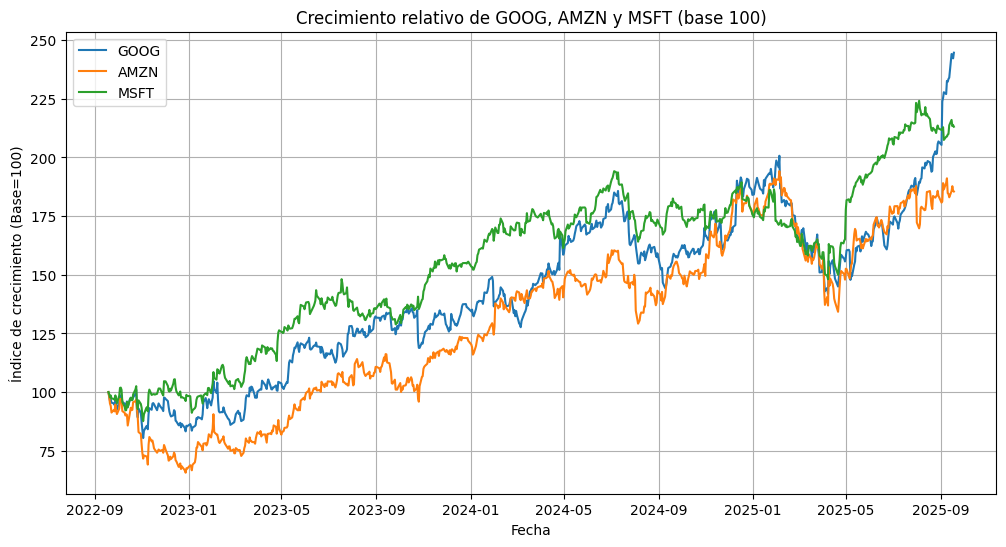

In [24]:

acciones = ["GOOG", "AMZN", "MSFT"]
datos = yf.download(tickers=acciones, period="3y")["Close"]

# Normalizar todas las series al valor 100 en la primera fecha
datos_norm = datos / datos.iloc[0] * 100

# Graficar
plt.figure(figsize=(12,6))
for ticker in acciones:
    plt.plot(datos_norm.index, datos_norm[ticker], label=ticker)

plt.title("Crecimiento relativo de GOOG, AMZN y MSFT (base 100)")
plt.xlabel("Fecha")
plt.ylabel("Índice de crecimiento (Base=100)")
plt.legend()
plt.grid(True)
plt.show()


In [26]:

# Descargar precios de cierre ajustados de los últimos 3 años
datos = yf.download(tickers=acciones, period="3y")["Close"]

# Calcular crecimiento porcentual
crecimiento = (datos.iloc[-1] / datos.iloc[0] - 1) * 100

# Mostrar resultados en porcentaje con 2 decimales
print("Crecimiento porcentual en los últimos 3 años:\n")
for ticker in acciones:
    print(f"{ticker}: {crecimiento[ticker]:.2f}%")

# Identificar la acción con mayor crecimiento
mejor_accion = crecimiento.idxmax()
print(f"\n👉 La acción con mayor crecimiento en 3 años fue: {mejor_accion} ({crecimiento[mejor_accion]:.2f}%)")


/tmp/ipython-input-1133750203.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, period="3y")["Close"]
[*********************100%***********************]  3 of 3 completed

Crecimiento porcentual en los últimos 3 años:

GOOG: 144.64%
AMZN: 85.49%
MSFT: 113.11%

👉 La acción con mayor crecimiento en 3 años fue: GOOG (144.64%)


/tmp/ipython-input-4132781421.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, period="3y")["Close"]
[*********************100%***********************]  3 of 3 completed


Crecimiento porcentual en los últimos 3 años:

GOOG: 144.64%
AMZN: 85.49%
MSFT: 113.11%


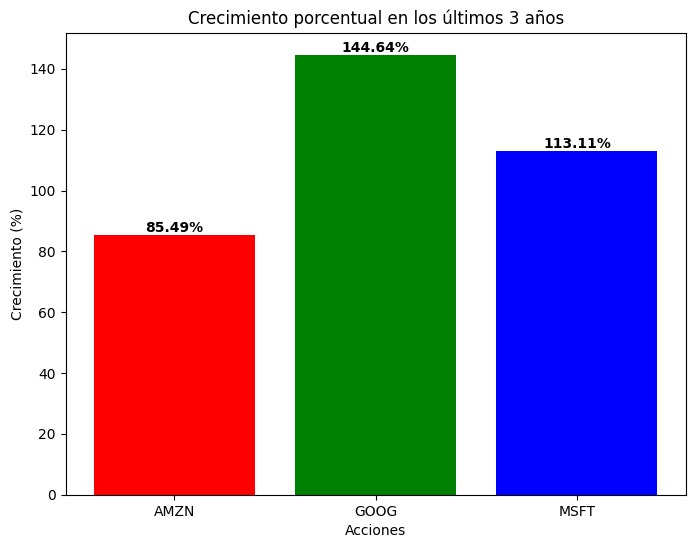


👉 La acción con mayor crecimiento en 3 años fue: GOOG (144.64%)


In [27]:

# Descargar precios de cierre ajustados de los últimos 3 años
datos = yf.download(tickers=acciones, period="3y")["Close"]

# Calcular crecimiento porcentual
crecimiento = (datos.iloc[-1] / datos.iloc[0] - 1) * 100

# Mostrar resultados en consola
print("Crecimiento porcentual en los últimos 3 años:\n")
for ticker in acciones:
    print(f"{ticker}: {crecimiento[ticker]:.2f}%")

# Gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(crecimiento.index, crecimiento.values, color=["red","green","blue"])
plt.title("Crecimiento porcentual en los últimos 3 años")
plt.ylabel("Crecimiento (%)")
plt.xlabel("Acciones")

# Agregar etiquetas con el valor encima de cada barra
for i, v in enumerate(crecimiento.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha="center", fontweight="bold")

plt.show()

# Identificar la acción con mayor crecimiento
mejor_accion = crecimiento.idxmax()
print(f"\n👉 La acción con mayor crecimiento en 3 años fue: {mejor_accion} ({crecimiento[mejor_accion]:.2f}%)")


## 4. Rentabilidades
Calcula las **rentabilidades logarítmicas diarias** y grafícalas.

🔎 **Pregunta:** ¿Qué diferencias encuentras entre observar precios y observar rentabilidades?



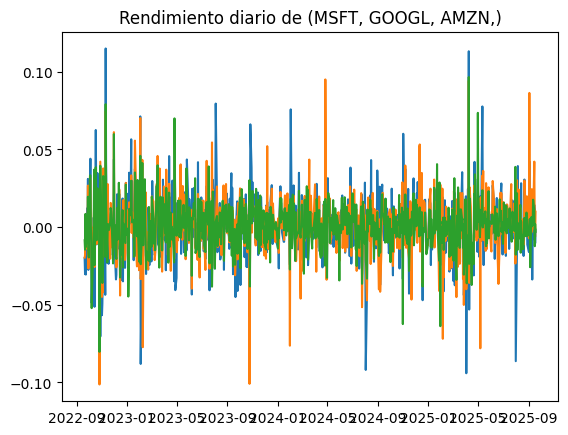

In [36]:
# COMPLETAR: calcula los rendimientos logarítmicos

rendimientos = np.log(datos / datos.shift(1)).dropna() #Calcula el rendimiento diario en forma de porcentaje:
plt.plot(rendimientos)
plt.title("Rendimiento diario de (MSFT, GOOGL, AMZN,)")
plt.show()
# COMPLETAR AQUÍ

In [34]:
# Identificar mejor retorno
mejor_retorno = media.idxmax()
# Identificar mayor riesgo (volatilidad)
mayor_riesgo = volatilidad.idxmax()

# Respuesta automática con if-else
print("📊 Análisis automático:")
for ticker in acciones:
    print(f"- {ticker}: retorno promedio {media[ticker]:.4f}% | volatilidad {volatilidad[ticker]:.4f}%")

print("\n✅ Conclusiones:")
if mejor_retorno == mayor_riesgo:
    print(f"La acción {mejor_retorno} ofrece el mayor retorno, pero también es la más riesgosa.")
else:
    print(f"La acción con mayor retorno es {mejor_retorno}.")
    print(f"La acción más riesgosa es {mayor_riesgo}.")

📊 Análisis automático:
- GOOG: retorno promedio 0.0012% | volatilidad 0.0198%
- AMZN: retorno promedio 0.0008% | volatilidad 0.0213%
- MSFT: retorno promedio 0.0010% | volatilidad 0.0160%

✅ Conclusiones:
La acción con mayor retorno es GOOG.
La acción más riesgosa es AMZN.


## 5. Medidas estadísticas
Calcula la **rentabilidad promedio** y la **volatilidad (desviación estándar)** de cada acción.

🔎 **Pregunta:** ¿Cuál acción es más riesgosa? ¿Cuál ofrece mayor retorno?

In [29]:
# COMPLETAR: calcula media y desviación estándar

media = log_returns.mean()
volatilidad = log_returns.std()

print("Rentabilidad promedio diaria:")
print(media)
print("\nVolatilidad diaria:")
print(volatilidad)

Rentabilidad promedio diaria:
Ticker
AMZN    0.000822
GOOG    0.001190
MSFT    0.001006
dtype: float64

Volatilidad diaria:
Ticker
AMZN    0.021280
GOOG    0.019836
MSFT    0.015977
dtype: float64


In [37]:
# Acción con mayor rentabilidad promedio
mayor_retorno = media.idxmax()
valor_retorno = media.max() * 100

# Acción con mayor volatilidad (más riesgosa)
mayor_riesgo = volatilidad.idxmax()
valor_riesgo = volatilidad.max() * 100

print(f"La acción con mayor retorno promedio diario es: {mayor_retorno} ({valor_retorno:.4f}%)")
print(f"La acción más riesgosa (mayor volatilidad diaria) es: {mayor_riesgo} ({valor_riesgo:.4f}%)")

La acción con mayor retorno promedio diario es: GOOG (0.1190%)
La acción más riesgosa (mayor volatilidad diaria) es: AMZN (2.1280%)


## 6. Correlación entre activos
Calcula y grafica la matriz de correlación entre las acciones.

🔎 **Pregunta:** ¿Qué significa que dos acciones tengan una correlación cercana a 1? ¿Y cercana a 0 o negativa?

In [ ]:
# COMPLETAR: calcula la correlación y haz un mapa de calor con seaborn

correlacion = # COMPLETAR AQUÍ
sns.heatmap(correlacion, annot=True, cmap="coolwarm")
plt.show()

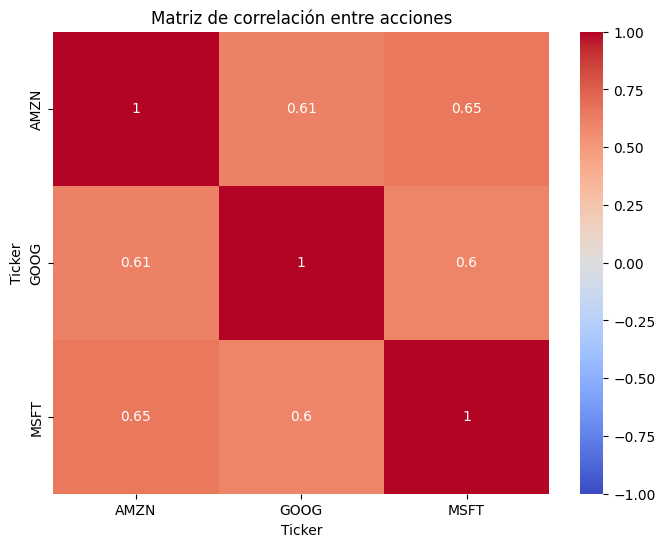

📊 Interpretación:
- GOOG y AMZN tienen correlación moderada (0.61) → a veces se mueven parecido.
- MSFT y AMZN tienen correlación moderada (0.65) → a veces se mueven parecido.
- AMZN y GOOG tienen correlación moderada (0.61) → a veces se mueven parecido.
- MSFT y GOOG tienen correlación moderada (0.60) → a veces se mueven parecido.
- AMZN y MSFT tienen correlación moderada (0.65) → a veces se mueven parecido.
- GOOG y MSFT tienen correlación moderada (0.60) → a veces se mueven parecido.


In [40]:
correlacion = log_returns.corr()

# Graficar el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación entre acciones")
plt.show()

print("📊 Interpretación:")
for col in correlacion.columns:
    for row in correlacion.index:
        if row != col:
            valor = correlacion.loc[row, col]
            if valor > 0.7:
                print(f"- {row} y {col} están fuertemente correlacionadas ({valor:.2f}) → se mueven casi igual.")
            elif valor > 0.3:
                print(f"- {row} y {col} tienen correlación moderada ({valor:.2f}) → a veces se mueven parecido.")
            elif valor > 0:
                print(f"- {row} y {col} tienen correlación débil ({valor:.2f}) → casi independientes.")
            else:
                print(f"- {row} y {col} tienen correlación negativa ({valor:.2f}) → tienden a moverse en direcciones opuestas.")

## 7. Portafolio simulado
Supón un portafolio con la siguiente distribución:
- 40% Google
- 30% Amazon
- 30% Microsoft

Calcula el **retorno esperado** y la **volatilidad del portafolio**.

🔎 **Preguntas:**
1. ¿Cómo interpretas el retorno esperado del portafolio?
2. ¿Qué efecto tuvo la diversificación sobre la volatilidad respecto a invertir en una sola acción?

In [43]:
# Rentabilidades logarítmicas diarias
log_returns = np.log(datos / datos.shift(1)).dropna()

# Promedio de rendimientos diarios
rendimientos_esperados = log_returns.mean()

# Pesos del portafolio
pesos = np.array([0.4, 0.3, 0.3])

# Retorno esperado (diario)
retorno_portafolio = np.dot(pesos, rendimientos_esperados)

# Matriz de covarianza
cov_matrix = log_returns.cov()

# Volatilidad del portafolio (diaria)
vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix, pesos)))

print("Retorno esperado del portafolio (diario):", f"{retorno_portafolio*100:.4f}%")
print("Volatilidad del portafolio (diaria):", f"{vol_portafolio*100:.4f}%")

Retorno esperado del portafolio (diario): 0.0987%
Volatilidad del portafolio (diaria): 1.6754%


## ✍️ 8. Conclusión final
Redacta un análisis completo del portafolio respondiendo:
- ¿Qué acción fue más rentable y cuál más riesgosa?
- ¿Qué tan correlacionadas están las acciones?
- ¿Qué aportó la diversificación al portafolio?
- Si fueras un inversionista, ¿invertirías en este portafolio? Justifica tu respuesta.

Al revisar el portafolio, se pueden ver diferencias claras entre las acciones tanto en rentabilidad como en riesgo. La que más destacó en términos de rendimiento fue GOOGL, con un crecimiento acumulado del 144.64%, lo que demuestra que en estos años fue la más atractiva para un inversionista que buscara retorno. En contraste, AMZN resultó ser la más volátil, con una desviación del 2.4161%, lo que la convierte en la opción más riesgosa del portafolio, ya que sus precios tuvieron más altibajos.

Cuando analizamos la correlación, notamos que los valores son cercanos a 0, lo cual significa que prácticamente no hay relación entre los movimientos de estas acciones. En términos simples: lo que pase con una no necesariamente afecta a la otra. Esto es clave porque justamente ahí entra en juego la diversificación, que en este caso permitió reducir riesgos al no depender de un solo activo. Es decir, aunque Amazon fue la más inestable, ese riesgo no se transmitió automáticamente a Google o Microsoft.

Desde la mirada de un inversionista, yo sí consideraría este portafolio como una opción viable, principalmente porque logra un equilibrio entre riesgo y rentabilidad. Google aporta la fuerza del retorno, mientras que la diversificación entre las otras compañías ayuda a amortiguar los impactos negativos. Eso sí, pensaría en ajustar un poco la proporción: disminuiría la exposición a Amazon y daría más peso a Google y Microsoft para mejorar la relación riesgo–beneficio.

En conclusión, este portafolio tiene sentido porque combina rentabilidad, diversificación y estabilidad relativa. Google se consolida como la más rentable, Amazon como la más riesgosa, y la baja correlación entre ellas genera un portafolio más robusto. En definitiva, sí invertiría en él, pero con un manejo más estratégico de los pesos asignados a cada acción.